In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data

# Getting some free samples
results_df.sample(3)

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/SimplifierTopDown1e-1.py', '../models/SimplifierBottomUpOnlyLast.py', '../models/SimplifierTopDownOnlyLast.py', '../models/SimplifierTopDown1e-0.py', '../models/SimplifierTopDown1e-4.py', '../models/SimplifierTopDown1e-6.py', '../models/Vanilla.py', '../models/SimplifierTopDown.py', '../models/SimplifierTopDown1e-10.py', '../models/SimplifierTopDown1e-2.py', '../models/SimplifierBottomUp.py'] ['Top Down 1e-1', 'Bottom Up (only last)', 'Top Down (only last)', 'Top Down 1e-0', 'Top Down 1e-4', 'Top Down 1e-6', 'Without simplify', 'Top Down', 'Top Down 1e-10', 'Top Down 1e-2', 'Bottom Up']
(87, 14)
['Without simplify' 'Bottom Up']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Yacht']
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 149]


In [2]:
all_data = []
for i, row in results_df.iterrows():
    model, dataset, random_state = row.loc[['model', 'dataset', 'random_state']]

    files = glob(f"{results_path}/{dnames_to_ugly[dataset]}/{nice_to_ugly[model]}/"
                f"*{random_state}_evolution.csv")

    for file in files:
        data = pd.read_csv(file)
        
        for gen in gens:
            try:
                row = data[data['gen']==gen].iloc[0] # should have just 1 row
            except Exception as e:
                pass
                # print(e)
                # print(file, gen)
                # print(row)

            all_data.append((model, dataset, *row))
            
all_data_df = pd.DataFrame(all_data, 
                           columns=(
                               'model',
                               'dataset',
                               *row.index
                           ))

all_data_df = all_data_df.replace([np.inf, -np.inf], np.nan).dropna()

print(all_data_df.shape)
print(all_data_df['model'].unique())
print(all_data_df['dataset'].unique())
all_data_df.sample(5)

(1305, 27)
['Without simplify' 'Bottom Up']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Yacht']


,model,dataset,gen,evals,best_size,n_simplifications,n_new_hashes,avg train error,avg train size,avg val error,...,std val error,std val size,min train error,min train size,min val error,min val size,max train error,max train size,max val error,max val size
926,Bottom Up,Housing,120.0,48.0,11.0,29.0,64.0,254.731424,2.458333,269.504618,...,143.041775,2.871979,28.757845,1.0,18.213088,1.0,333.835956,11.0,356.416033,11.0
569,Without simplify,Energy Heating,149.0,48.0,24.0,0.0,0.0,62.183787,5.750000,63.412232,...,44.680785,5.775307,8.150526,2.0,5.647747,2.0,99.710309,24.0,103.608974,24.0
834,Bottom Up,Housing,100.0,48.0,9.0,19.0,57.0,274.641940,1.729167,210.089085,...,85.309612,1.834162,25.391469,1.0,23.141401,1.0,327.669930,9.0,250.978410,9.0
860,Bottom Up,Housing,60.0,48.0,5.0,8.0,32.0,276.025669,1.208333,342.146225,...,95.895019,0.705878,36.332514,1.0,39.677472,1.0,301.871371,5.0,374.723276,5.0
799,Bottom Up,Housing,50.0,48.0,7.0,15.0,60.0,274.951888,1.458333,275.301301,...,91.539717,1.337883,34.907145,1.0,37.084234,1.0,313.505560,7.0,313.058937,7.0


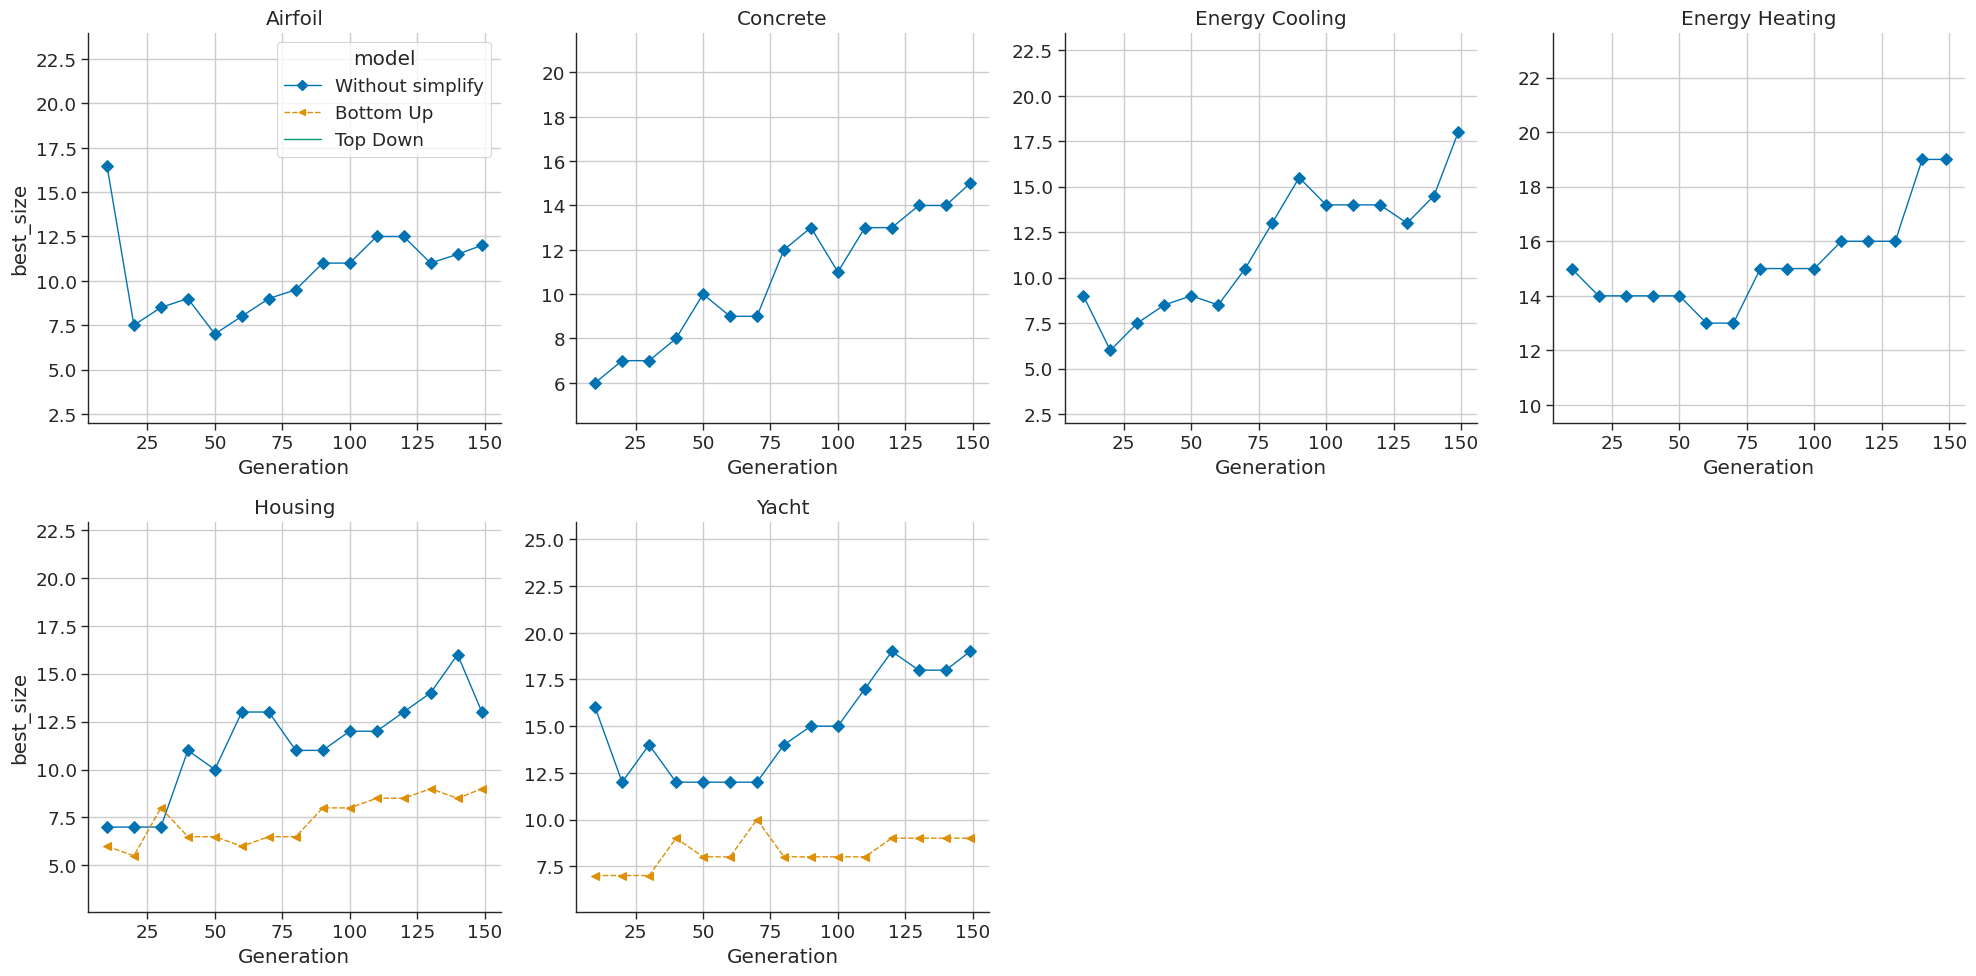

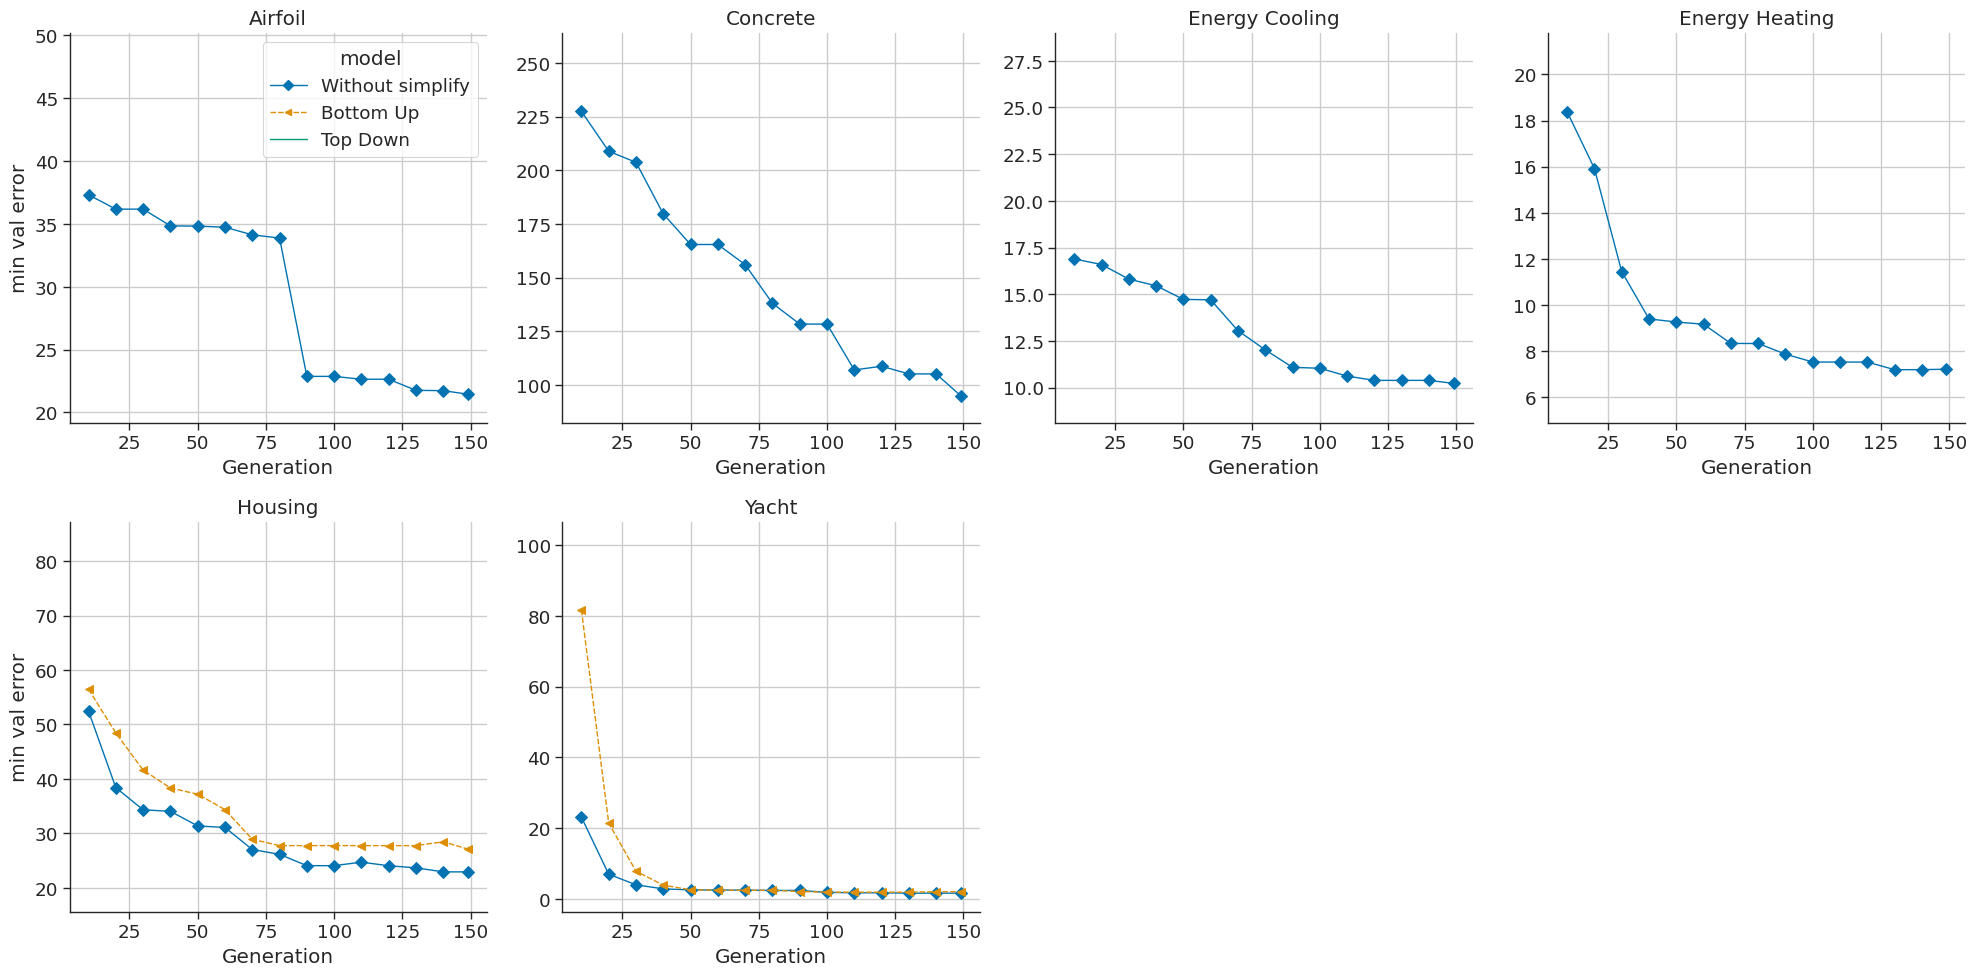

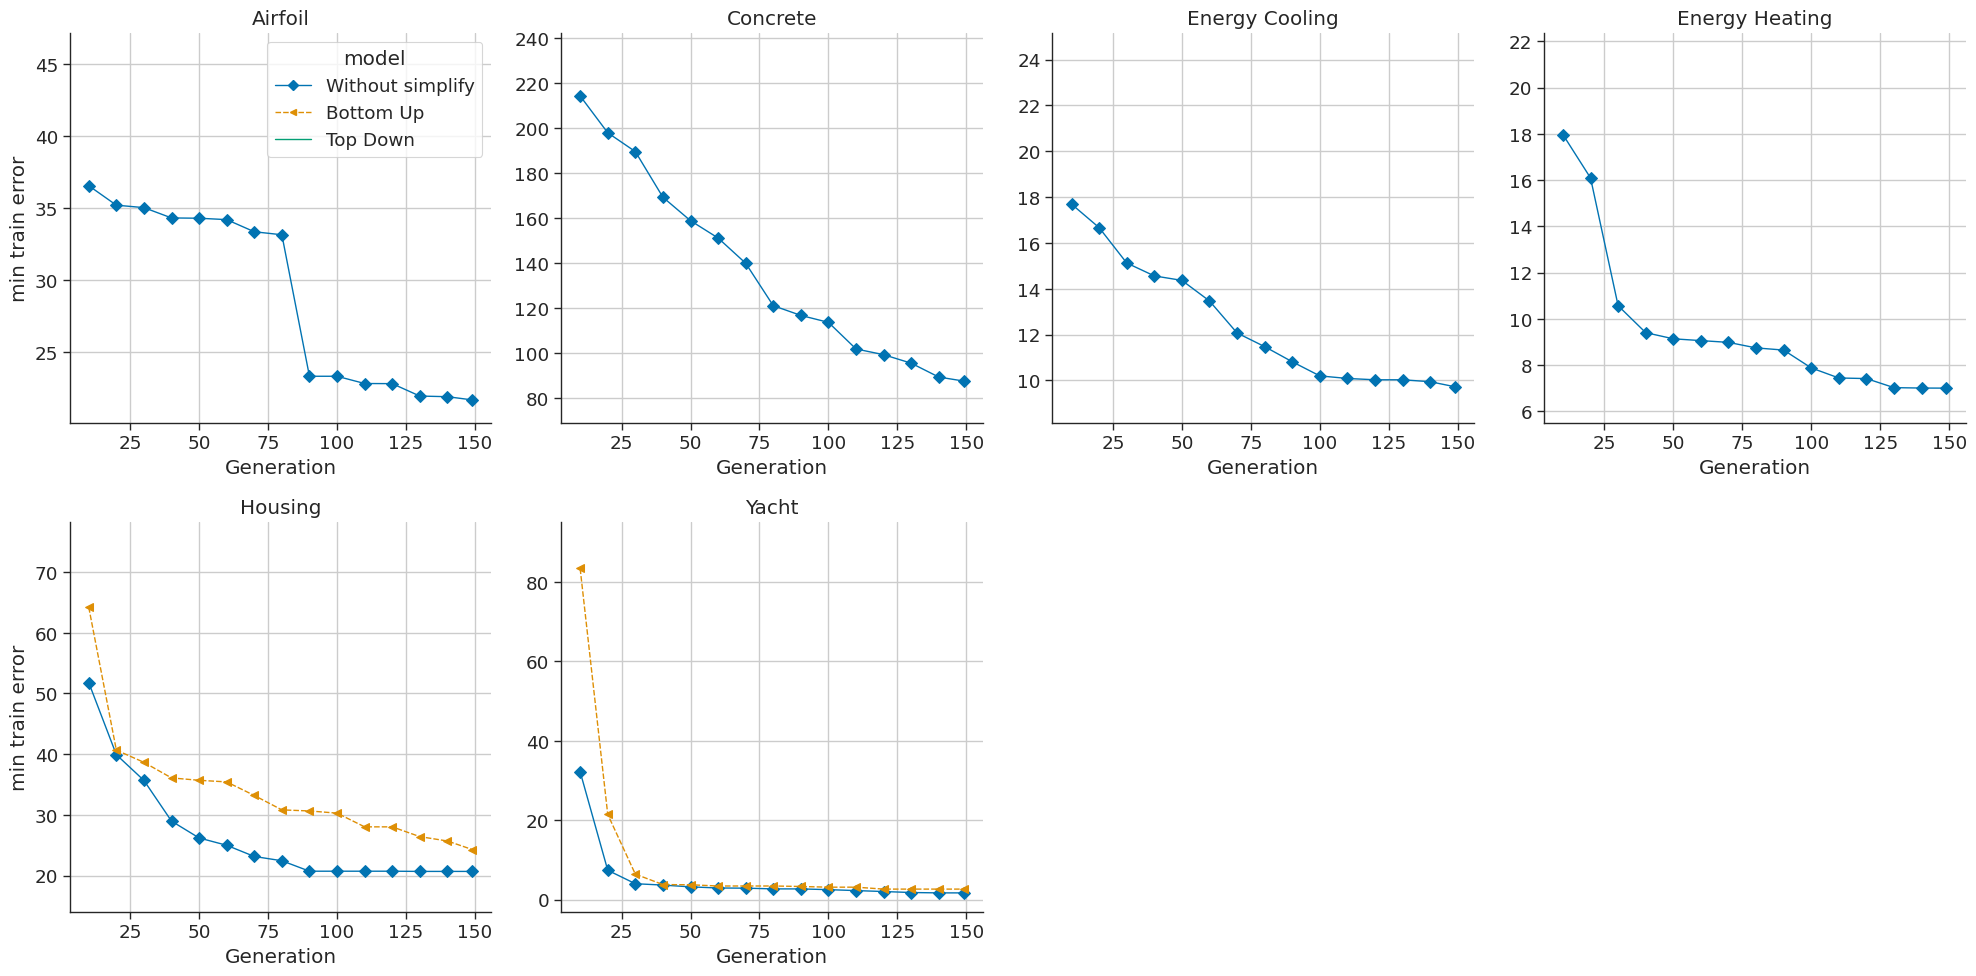

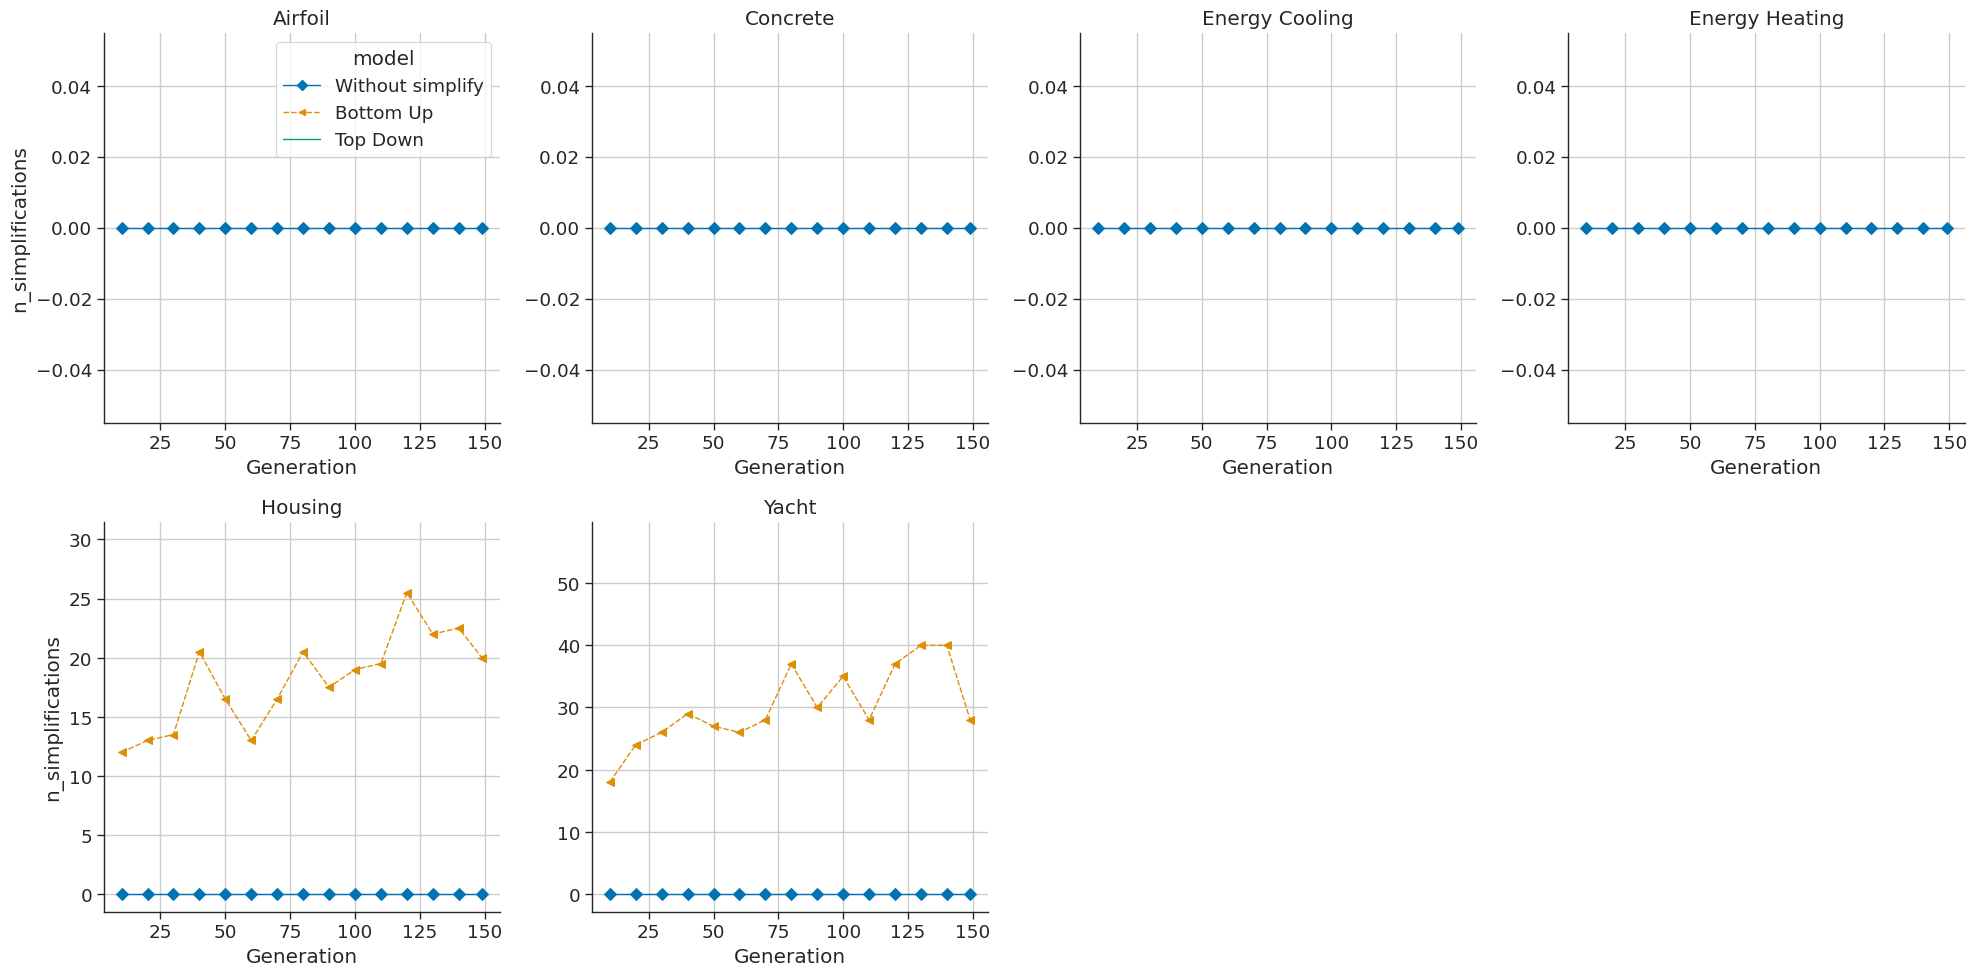

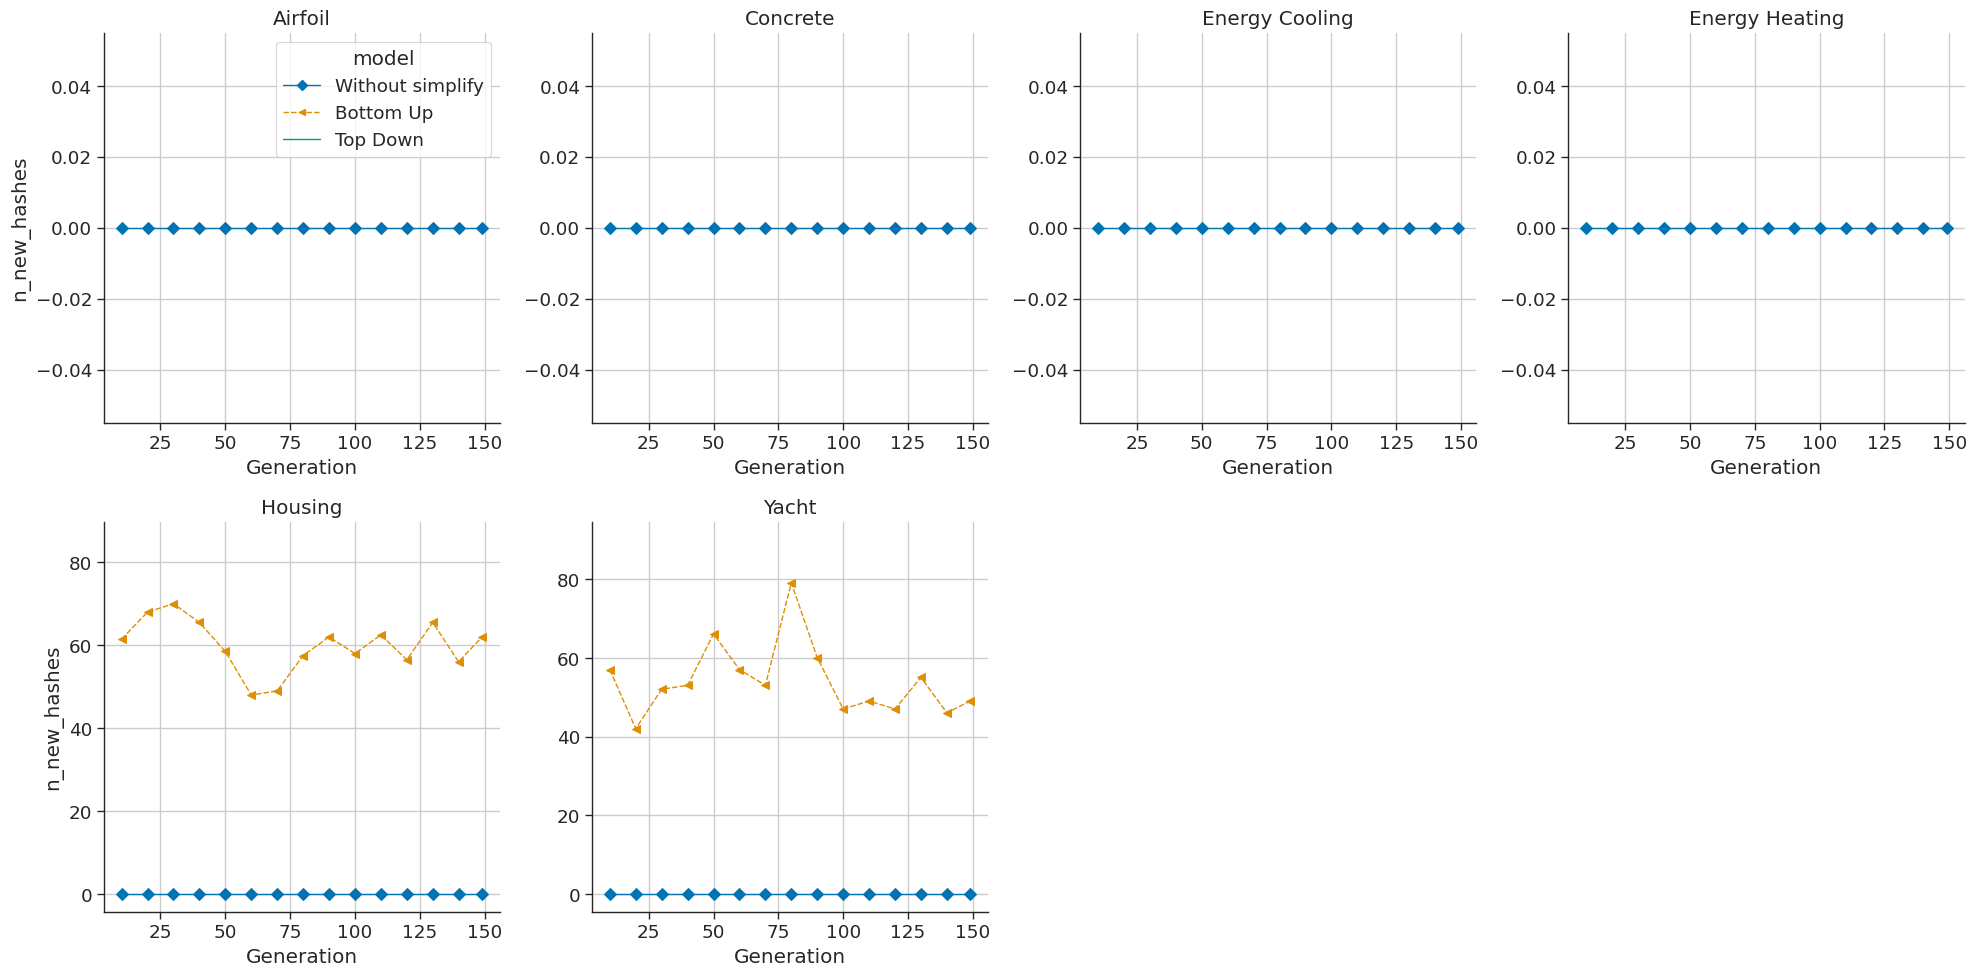

In [3]:
for col in [
    'best_size','min val error', 'min train error',
    'n_simplifications','n_new_hashes',
    #'med train error','med train size','med val error','med val size',
]:
    
    # about errors: https://seaborn.pydata.org/tutorial/error_bars.html
    g = sns.relplot(
        data=all_data_df,
        x="gen", y=col, col="dataset", hue="model",
        style="model", col_wrap=col_wrap, markers=marker_choice, markeredgecolor=None, 
        kind="line", facet_kws={'sharey': False, 'sharex': False, 'legend_out':False}, 
        hue_order = order, estimator=np.median, markersize=6,
        
        err_style='bars', err_kws={'capsize':0.0, 'linewidth':0.0}, # 2.0, 0.5
        #err_style='band', err_kws={'alpha':0.1},
    )
    g.set_titles("{col_name}")

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='both', linewidth=1)
        plot_ax.set_xlabel("Generation")

    if False: # use log scale
        # g.set(xscale="log")
        g.set(yscale="log")

    plt.tight_layout()
    plt.savefig(f"../paper/figs/{col}.pdf")
    plt.savefig(f"../paper/figs/{col}.png")
    plt.show()